In [1]:
# find probability range of an uneven coin toss with 8d% chance of head
# confidence level 95%
import time
import pandas as pd
import numpy as np
import random
n=10000
df = pd.DataFrame(1, index=np.arange(n), columns=['col','value'])

In [6]:
start = time.time()
l=[]
for j in range(n):
    s=0
    for i in range(5000):
        if random.uniform(0.0, 1.0)>0.85:
            s=s+1
    df.loc[j,['col']]=s/5000
    
end = time.time()
print(end - start)

17.064620971679688


In [2]:
start = time.time()
def p_HeadTail(s):
    s=0
    for i in range(5000):
        if random.uniform(0.0, 1.0)>0.85:
            s=s+1
    return s/5000
df.loc[0:n,['col']]=list(map(p_HeadTail, range(n)))

end = time.time()
print(end - start)

11.652836322784424


In [9]:
from multiprocessing import Pool
start = time.time()
def p_HeadTail(s):
    s=0
    for i in range(5000):
        if random.uniform(0.0, 1.0)>0.85:
            s=s+1
    return s/5000

if __name__ == '__main__':
    p = Pool(processes=32)
    df.loc[0:n,['col']]=p.map(p_HeadTail, range(n))
end = time.time()
print(end - start)

1.1558582782745361


In [7]:
start = time.time()
def HeadTail(s):
    s=1
    p=random.uniform(0.0, 1.0)
    if p>0.85:
        s=0
    return s
def p_HeadTail(m):
    list_HT=list(map(HeadTail, range(5000)))    
    return sum(list_HT)/len(list_HT)
df.loc[0:n,['col']]=list(map(p_HeadTail, range(n)))
end = time.time()
print(end - start)

14.875150680541992


In [8]:
start = time.time()
def HeadTail(s):
    s=1
    p=random.uniform(0.0, 1.0)
    if p>0.85:
        s=0
    return s
def p_HeadTail(m):
    list_HT=list(map(HeadTail, range(5000)))    
    return sum(list_HT)/len(list_HT)
if __name__ == '__main__':
    p = Pool(processes=32)
    df.loc[0:n,['col']]=p.map(p_HeadTail, range(n))
end = time.time()
print(end - start)

1.5882525444030762


In [10]:
#fastest method
import time
import pandas as pd
import numpy as np
import random
from multiprocessing import Pool
n=20000000
df = pd.DataFrame(1, index=np.arange(n), columns=['col','value'])

start = time.time()
def p_HeadTail(s):
    s=0
    for i in range(5000):
        if random.uniform(0.0, 1.0)>0.85:
            s=s+1
    return s/5000

if __name__ == '__main__':
    p = Pool(processes=32)
    df.loc[0:n,['col']]=p.map(p_HeadTail, range(n))
end = time.time()
print(end - start)

1252.8189730644226


In [67]:
import pandas as pd
df = pd.DataFrame({'col':l})
#df['col']=df['col'].astype(str)
df['value']=1

In [11]:
import numpy as np
pivot_df=pd.pivot_table(df, aggfunc=len , values='value',index=['col']) #or np.sum

In [52]:
from __future__ import division, print_function
import numpy as np, scipy.stats as st

# create custom discrete random variable from data set
rv = st.rv_discrete(values=(np.asarray(pivot_df.index.tolist()), \
                            np.asarray(pivot_df['value'].tolist())/np.asarray(pivot_df['value'].tolist()).sum()))

# scipy.stats.rv_discrete has methods for median, confidence interval, etc.
print("median:", rv.median())
print("95% CI:", rv.interval(0.95))

median: 0.15
95% CI: (0.1402, 0.16)


<Figure size 432x288 with 0 Axes>

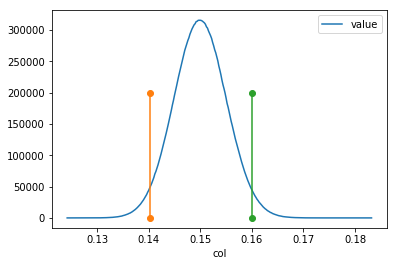

In [57]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import scipy

ci=rv.interval(0.95)
# cnfidence interval left line
one_x12, one_y12 = [ci[0],ci[0]], [0, 200000]
# cnfidence interval right line
two_x12, two_y12 = [ci[1],ci[1]], [0, 200000]
plt.figure();
pivot_df.plot();
plt.legend(loc='best')
plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
plt.show()